In [1]:
import numpy as np
from time import time
import torch
import pprint as pp

import matplotlib
import matplotlib.pyplot as plt

# Import the helper files
from utilities import get_time_string, print_elapsed_time

# Environment
* Observation Space: 33 dimensions of continuous type
* Action Space: 4 dimensions of continuous type
* Either one (1) or twenty (20) agents

In [2]:
INPUTDIM = 33
OUTPUTDIM = 4
NUMAGENTS = 20

In [3]:
#from mya2cnet import A2CNetwork
import mya2cnet

# Thx2: https://emacs.stackexchange.com/a/13483
import imp
imp.reload(mya2cnet)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

tstnet = mya2cnet.A2CNetwork(INPUTDIM, OUTPUTDIM).to(device)

## Test if a sample state of a single agent environment is propagated

In [4]:
tststate_np = np.array([
    [ 0.00000000e+00, -4.00000000e+00,  0.00000000e+00,  1.00000000e+00,
     -0.00000000e+00, -0.00000000e+00, -4.37113883e-08,  0.00000000e+00,
     0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
     0.00000000e+00,  0.00000000e+00, -1.00000000e+01,  0.00000000e+00,
     1.00000000e+00, -0.00000000e+00, -0.00000000e+00, -4.37113883e-08,
     0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
     0.00000000e+00,  0.00000000e+00,  7.90150642e+00, -1.00000000e+00,
     1.25147498e+00,  0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
     -2.99753308e-01]
])

In [5]:
tstnet.forward(tststate_np)

(tensor([[-0.0725,  0.1089,  0.1071, -0.0274]], dtype=torch.float64, device='cuda:0'),
 tensor([[ 0.1110]], dtype=torch.float64, device='cuda:0'))

# Generate Random Numbers to feed into the network

In [6]:
NRUNS = 1000
NITER = 100

#MODE = 'fullpass'
MODE = 'fullpass'

np.random.seed( np.uint32( time() ) ) 

a_np = np.zeros( (NRUNS*NITER, NUMAGENTS, OUTPUTDIM) )
v_np = np.zeros( (NRUNS*NITER, NUMAGENTS, 1) )

for itr in range(NITER):
    print(str(NITER - (itr+1)).rjust(3), end = ' -> ')
    sta = itr * NRUNS
    with torch.no_grad():
        for cnt in range(NRUNS):
            if MODE == 'fullpass':
                randstate_np = np.random.randn(NUMAGENTS, INPUTDIM) * 10
                randstate_np = np.clip(randstate_np, -10, 10)
                a, v, _, _ = tstnet.fullpass(randstate_np)
            
            if MODE == 'forward':
                randstate_np = np.random.randn(NUMAGENTS, INPUTDIM)
                randstate_np = np.clip(randstate_np, -1, 1)
                a, v = tstnet.forward(randstate_np)
            
            a_np[sta+cnt] = a.detach().cpu().numpy()
            v_np[sta+cnt] = v.detach().cpu().numpy()
        
    
print('FIN!')
print( f'Actions Min: {np.min(a_np)} Max: {np.max(a_np)}')

        
 

 99 ->  98 ->  97 ->  96 ->  95 ->  94 ->  93 ->  92 ->  91 ->  90 ->  89 ->  88 ->  87 ->  86 ->  85 ->  84 ->  83 ->  82 ->  81 ->  80 ->  79 ->  78 ->  77 ->  76 ->  75 ->  74 ->  73 ->  72 ->  71 ->  70 ->  69 ->  68 ->  67 ->  66 ->  65 ->  64 ->  63 ->  62 ->  61 ->  60 ->  59 ->  58 ->  57 ->  56 ->  55 ->  54 ->  53 ->  52 ->  51 ->  50 ->  49 ->  48 ->  47 ->  46 ->  45 ->  44 ->  43 ->  42 ->  41 ->  40 ->  39 ->  38 ->  37 ->  36 ->  35 ->  34 ->  33 ->  32 ->  31 ->  30 ->  29 ->  28 ->  27 ->  26 ->  25 ->  24 ->  23 ->  22 ->  21 ->  20 ->  19 ->  18 ->  17 ->  16 ->  15 ->  14 ->  13 ->  12 ->  11 ->  10 ->   9 ->   8 ->   7 ->   6 ->   5 ->   4 ->   3 ->   2 ->   1 ->   0 -> FIN!
Actions Min: -0.5158132908477306 Max: 0.7286148761161023


## Plot the actions mean and standard deviations over all agents

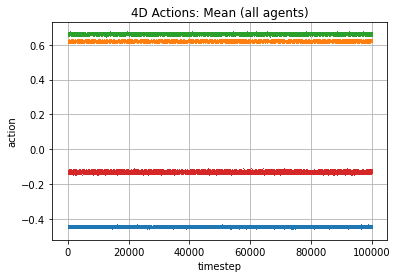

In [7]:
t = np.arange(0.0, NRUNS*NITER)
s = np.mean( a_np, 1 )

fig, ax = plt.subplots()
ax.plot(t, s, marker=',', linestyle='none')

ax.set(xlabel='timestep', ylabel='action',
       title='4D Actions: Mean (all agents)')
ax.grid()

plt.show()

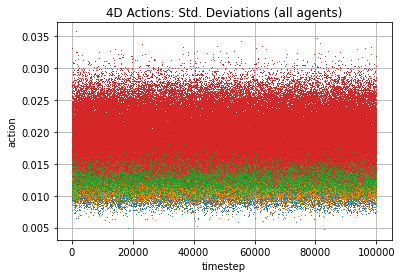

In [8]:
t = np.arange(0.0, NRUNS*NITER)
s = np.std( a_np, 1 )

fig, ax = plt.subplots()
ax.plot(t, s, marker=',', linestyle='none')

ax.set(xlabel='timestep', ylabel='action',
       title='4D Actions: Std. Deviations (all agents)')
ax.grid()

plt.show()

## Plot the value mean and standard deviation over all agents.

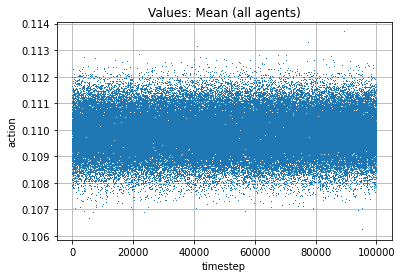

In [9]:
t = np.arange(0.0, NRUNS*NITER)
s = np.mean( v_np, 1 )

fig, ax = plt.subplots()
ax.plot(t, s, marker=',', linestyle='none')

ax.set(xlabel='timestep', ylabel='action',
       title='Values: Mean (all agents)')
ax.grid()

plt.show()

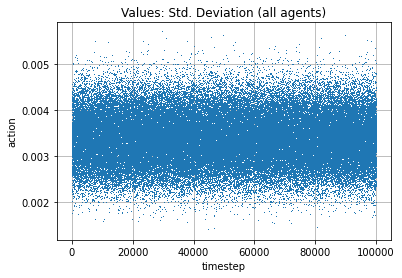

In [10]:
t = np.arange(0.0, NRUNS*NITER)
s = np.std( v_np, 1 )

fig, ax = plt.subplots()
ax.plot(t, s, marker=',', linestyle='none')

ax.set(xlabel='timestep', ylabel='action',
       title='Values: Std. Deviation (all agents)')
ax.grid()

plt.show()